# <font color="blue">Submitted by: Kaspar Kadalipp </font>
# HW7. Hashing, Bloom Filter

### <font color='orange'> Less important code is placed here</font>
### <font color='orange'> Report is below </font>

In [2]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("1000_keys.txt", encoding="utf-8") as file:
    numbers = [int(word.strip()) for word in file.readlines()]

def ex3(p, map_size, iterations, print_collisions=False):
    a_values = [int(_) for _ in np.random.randint(low=1, high=p, size=iterations)]
    b_values = [int(_) for _ in np.random.randint(low=0, high=p, size=iterations)]
    collisions =  []

    for a, b in zip(a_values, b_values):
        dict = defaultdict(lambda : -1)
        for number in numbers:
            result = ((a * number + b) % p) % map_size
            if print_collisions and result >= print_collisions:
                print(f"a: {a}, b: {b}, p: {p}, collisions: {result}")
            dict[result] += 1
        collisions.append(sum(dict.values())) # number of collisions
    return a_values, b_values, collisions, p, map_size, iterations


def visualize(x, y, z, p, map_size, iterations):
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.set_xlabel('a', size = 20)
    ax1.set_ylabel('b', size = 20)
    ax1.set_zlabel('collisions', size = 20)
    ax1.scatter3D(x, y, z, c=z, cmap='jet')
    ax1.set_title(f"Collisions for different a and b values from inserting 1000 elements\n\n"
                  f"Table size {map_size:_}, avg collisions {np.mean(z):.2f}\n"
                  f"{iterations} combinations of a and b,  p = {p}", size = 20)

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.scatter(x=y, y=z, c=z, cmap='jet')
    ax2.set_title("Distribution of Collisions\n", size = 20)
    ax2.set_ylabel("collisions", size = 20)
    ax2.xaxis.set_ticklabels([])
    plt.tight_layout()
    plt.show()

def avg_collisions(z1, z2, z3, z4):
    plt.figure(figsize=(8, 8))
    plt.plot([0, 1 ,2 ,3], [np.mean(z1),np.mean(z2),np.mean(z3),np.mean(z4)],linewidth=6)
    plt.xticks([0, 1, 2, 3], labels=['1000', '10 000', '100 000', '1_000 000'])
    plt.title("Average collisions from inserting 1000 elements", fontsize=16)
    plt.xlabel('Table Size', fontsize=16)
    plt.ylabel('Average collisions', fontsize=16)
    plt.grid()
    plt.show()

In [3]:
result1 = ex3(p=65543, map_size=1000, iterations=10000)

In [4]:
result2 = ex3(p=501031, map_size=10_000, iterations=10_000)

In [5]:
result3 = ex3(p=601333, map_size=100_000, iterations=10_000)

In [6]:
result4 = ex3(p=60_135_091, map_size=1_0000_000, iterations=10_000)

In [7]:
def ex4():
    with open("words.txt", encoding="utf-8") as file:
            words = [word.strip() for word in file.readlines()]

    def sum_words_hash(words):
        collisions = defaultdict(lambda : -1)
        for word in words:
            value = sum([ord(c) for c in word])
            collisions[value] += 1
        return sum(collisions.values()), max(collisions.values())

    def multiply_words_hash(words):
        collisions = defaultdict(lambda : -1)
        for word in words:
            value = 1
            for c in word:
                value *= ord(c)
            collisions[value] += 1
        return sum(collisions.values()), max(collisions.values())

    def concatenate_ord_hash(words):
        collisions = defaultdict(lambda : -1)
        for word in words:
            value = ""
            for c in word:
                value += str(ord(c))
            collisions[int(value)] += 1
        return sum(collisions.values())

    def builtin_hash(words):
        collisions = defaultdict(lambda : -1)
        for word in words:
            collisions[hash(word)] += 1
        return sum(collisions.values())

    print(f"Number of words {len(words):_}")
    print(f"Adding character values ord(c) together, collisions: {(s :=sum_words_hash(words))[0]:_} , most collisions on a slot: {s[1]}")
    print(f"Multiplying character values ord(c) together, collisions: {(m := multiply_words_hash(words))[0]:_}, most collisions on a slot: {m[1]}")
    print(f"Concatenating ord(c) as string and casting to int, collisions: {concatenate_ord_hash(words):_} ")
    print(f"Using builtin hash function, collisions: {builtin_hash(words):_} ")


# EX1

##### Use the integers as in <a href="https://courses.cs.ut.ee/MTAT.03.238/2022_fall/uploads/Main/1000_keys.txt">here</a>. Experiment with the universal hashing scheme as presented in the lecture. Assess the goodness of the universal scheme - hash the given integers to hash tables of sizes 1000, 10,000 , 100,000 and 1,000,000 slots. For each hash table size experiment with the p, a, and b selected randomly. Report (ideally visualize) the number of collisions in total for different table sizes (over many trials with random p, a and b).

$H_{p, m} = \{h_{a,b}$ $|$ $1 \leq a < p$, $0 \leq b < p\}$

$m$ = [1000, 10_000, 100_000, 1_000_000]

$h_{a, b} = ((ak+b)$ mod $p)$ mod $m$

I chose random prime p beforehand and generated random values for a and b. Choosing too high or low value for p increased collisions significantly. As can be seen from the plots the average number of collisions drops dramatically as the table size increases. Remaining plots show how number of collisions can change based on random values of a and b. The distribution of numbers is more uniform with fewer collisions. In 3D visualizations blue signifies fewer collisions and red higher number of collisions. Usefulness of 3D representations becomes more apparent in EX2.

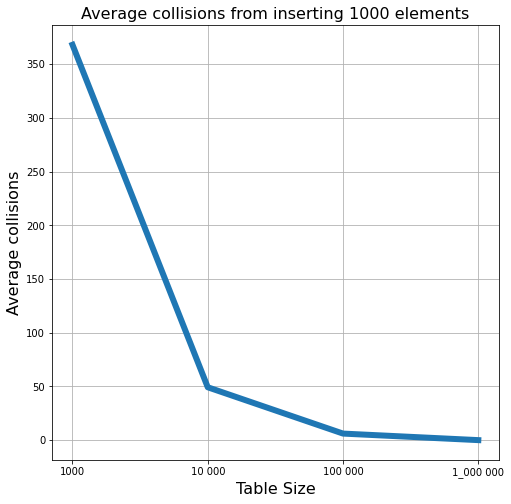

In [8]:
avg_collisions(result1[2], result2[2], result3[2], result4[2])

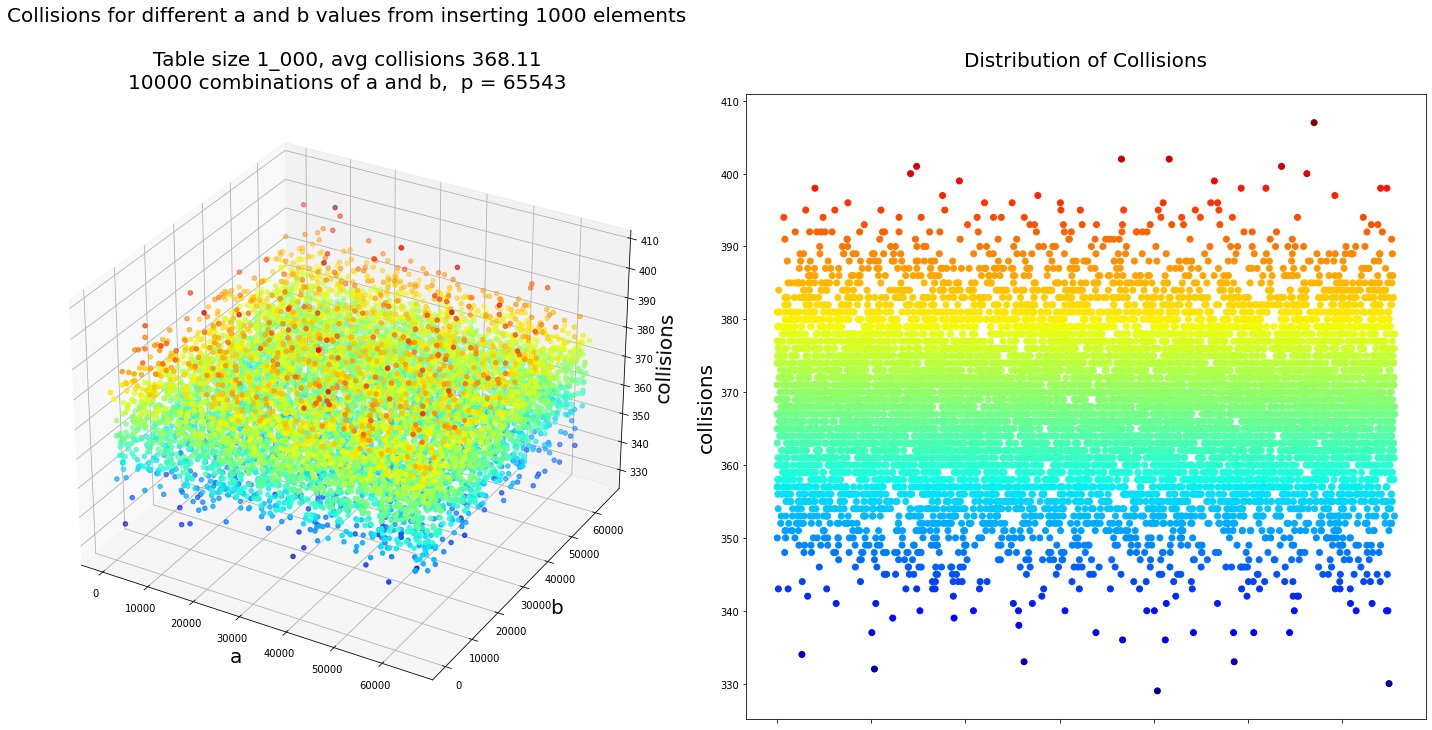

In [9]:
visualize(*result1)

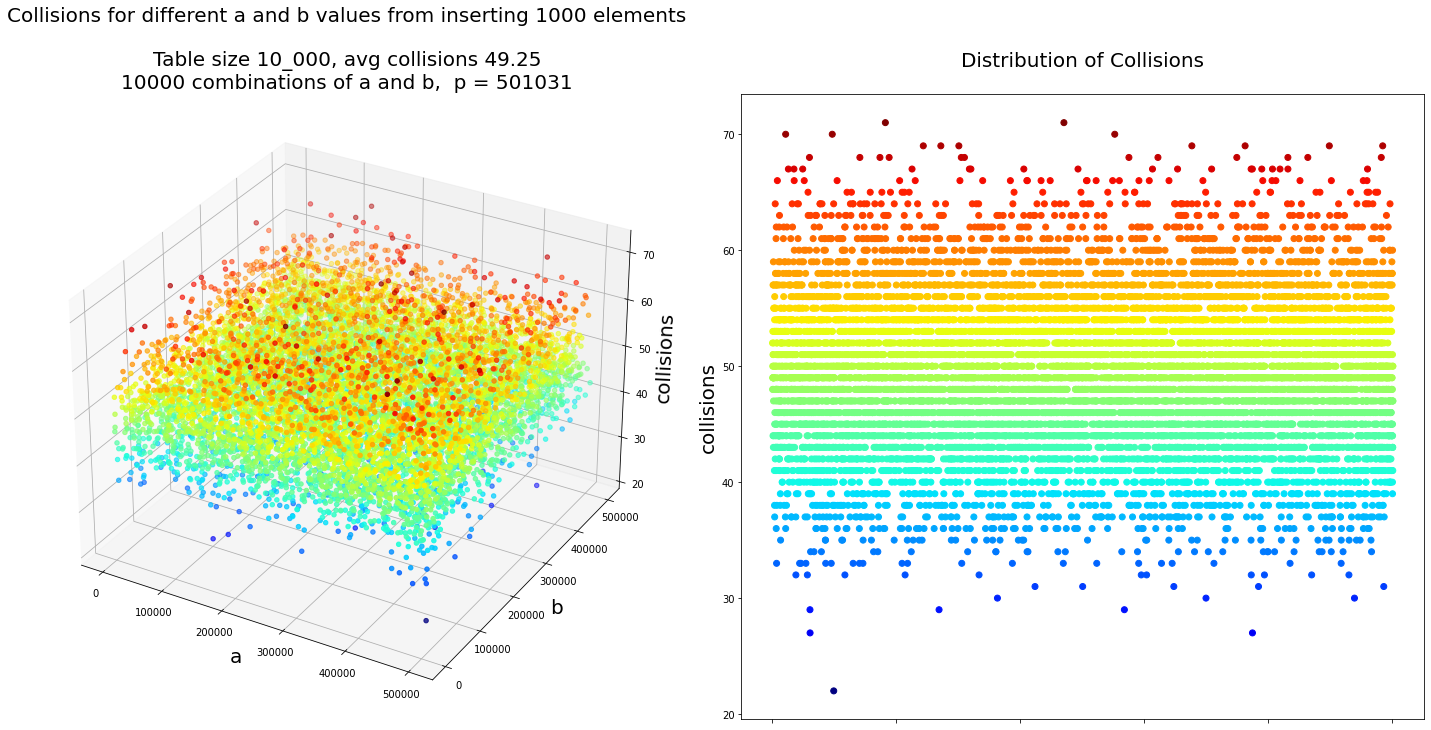

In [10]:
visualize(*result2)

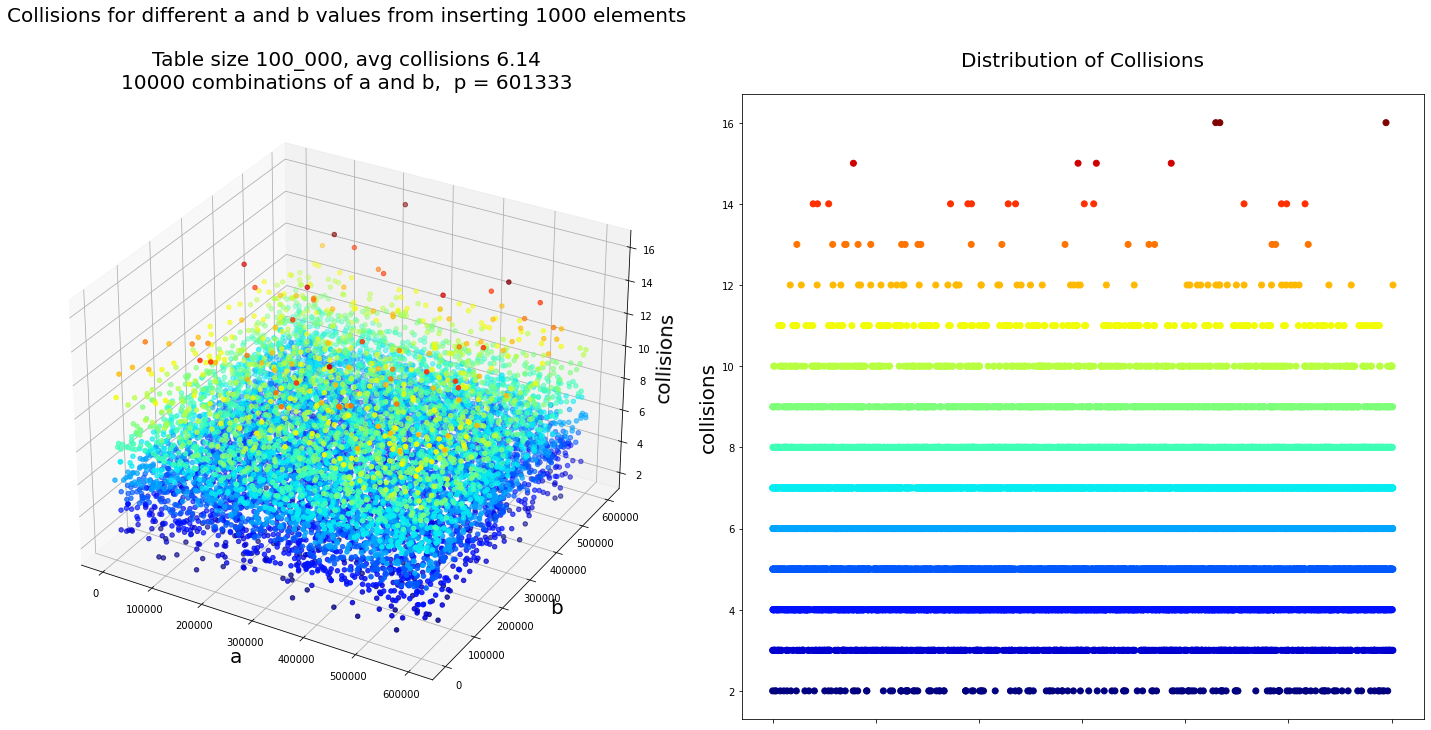

In [11]:
visualize(*result3)

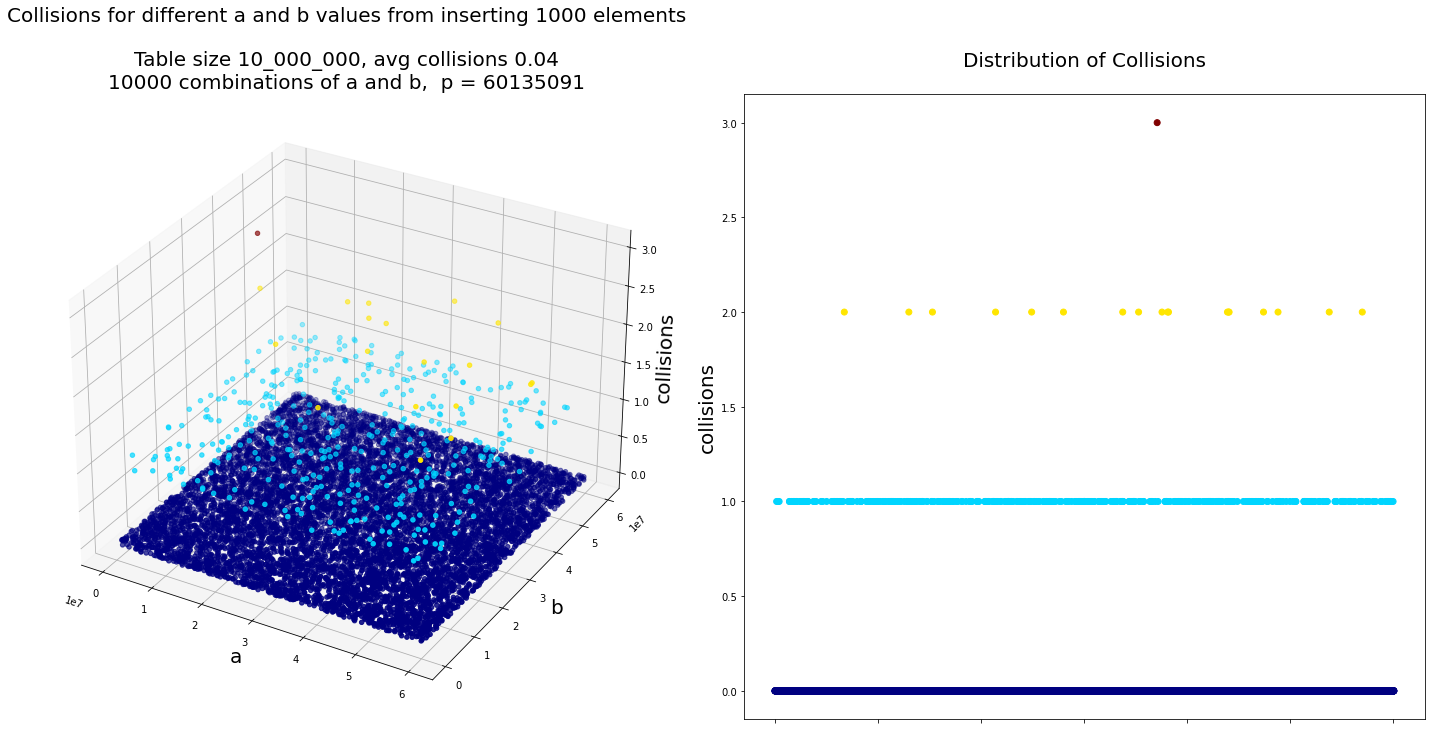

In [12]:
visualize(*result4)

# EX2

##### Find some p, m, a and b (for a universal family as described in the lectures) for which the integers given in EX1 are especially non-uniformly distributed (have many collisions in total or have too many collisions for one specific slot). How easy it is to find such bad cases? I.e. how many different hash functions did you have to evaluate? Describe how ignoring rules of selecting p, m, a or b can lead to a bad case (many collisions). Attempt to illustrate how the number of collisions are spread over the large set of random hash functions.

$h_{a, b} = ((ak+b)$ mod $p)$ mod $m$

I can guarantee that only the first element doesn't cause a collision when I choose a = 0 or p = 1. In both cases the number being hashed doesn't matter, because the result is always the same. Anyone can see that very small p can cause high number of collisions.
From plots of EX1 I can see that trying different values of a and b clearly changes the number of collision. But number of collisions can be much higher when changing p. I use 10 000 elements inserted into a table of size 1000 as an example.

Choosing p smaller than m means that mod of m doesn't change the hash and number of collisions here is constant.
Choosing p that isn't a prime causes very high number of collisions as well. Surprisingly there are gaps in the number of collisions, for example jump from ~370 collisions to ~570 collisions and then another jump to ~750 collisions with nothing in-between.

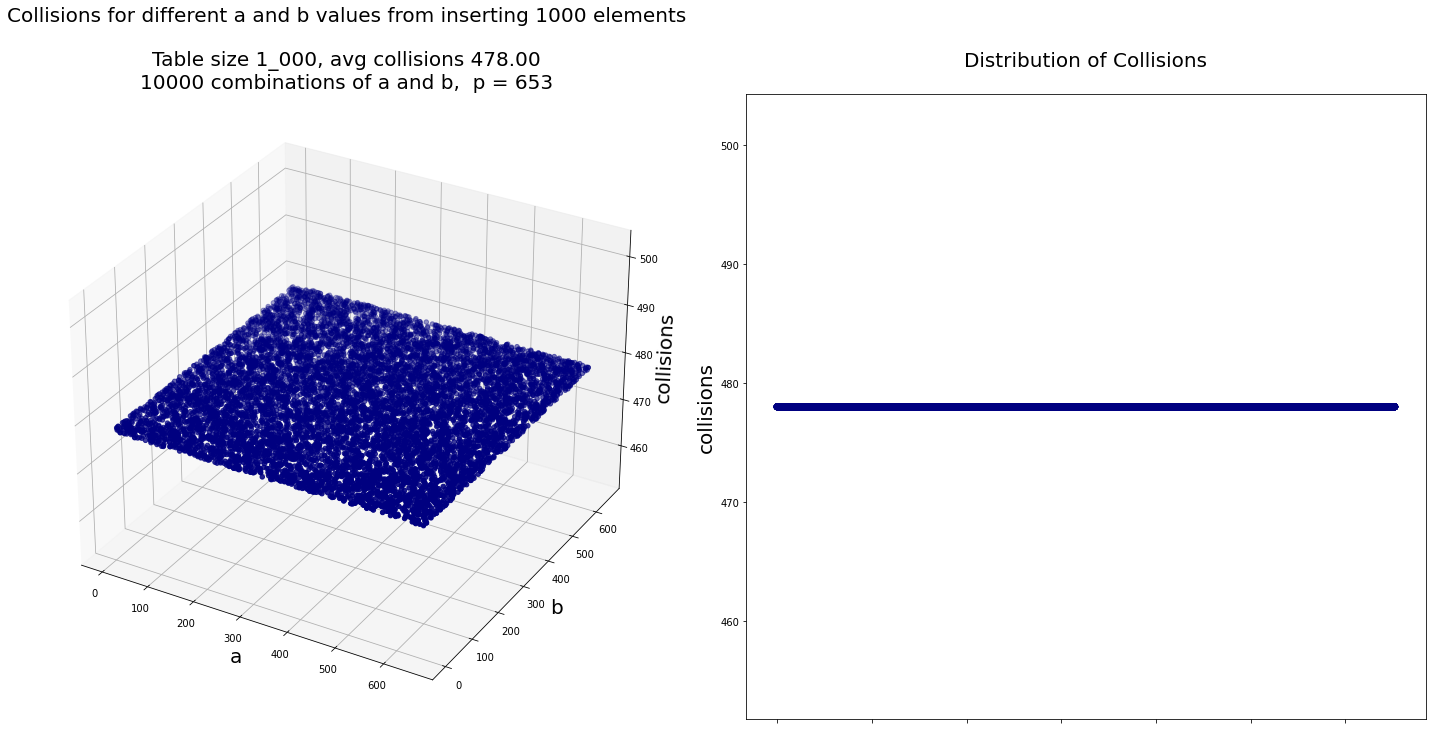

In [13]:
result5 = ex3(p=653, map_size=1000, iterations=10_000)
visualize(*result5)

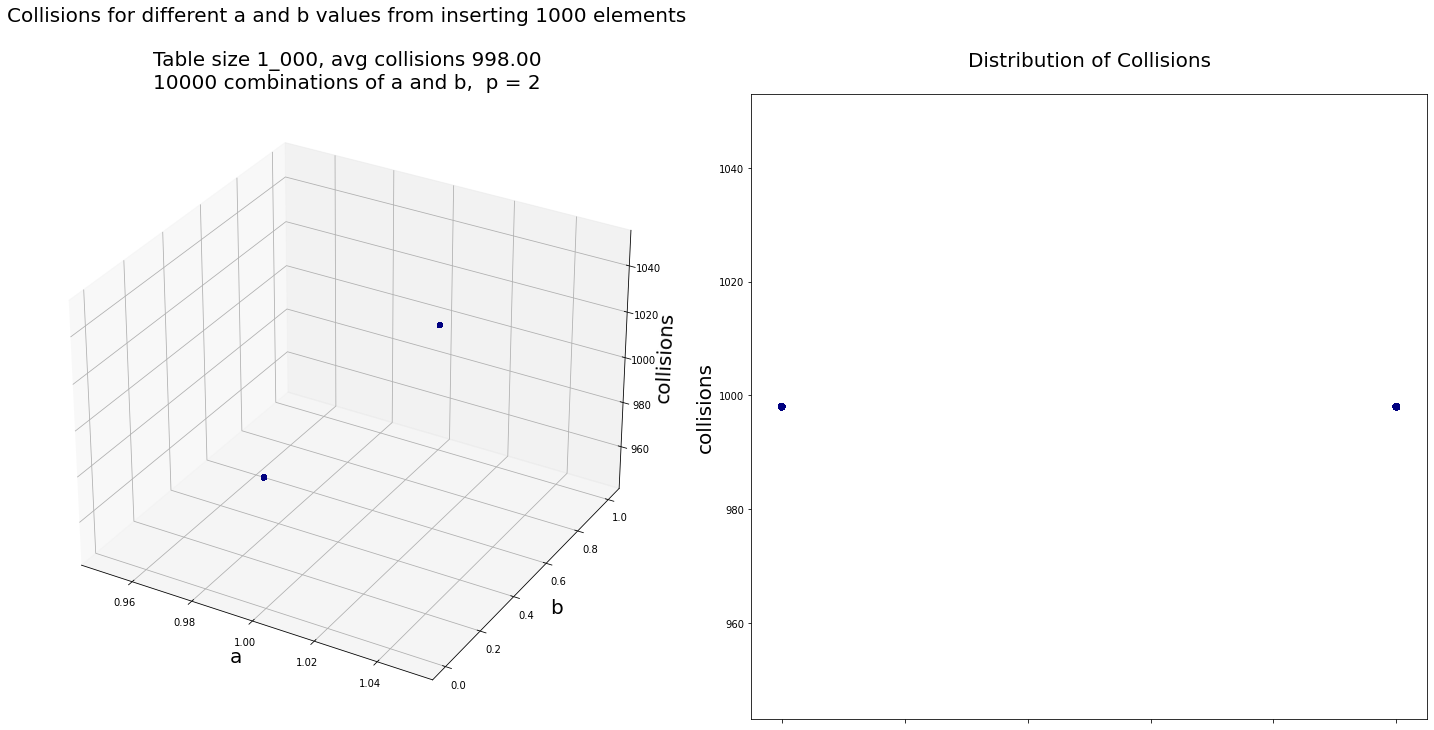

In [14]:
result6 = ex3(p=2, map_size=1000, iterations=10_000)
visualize(*result6)

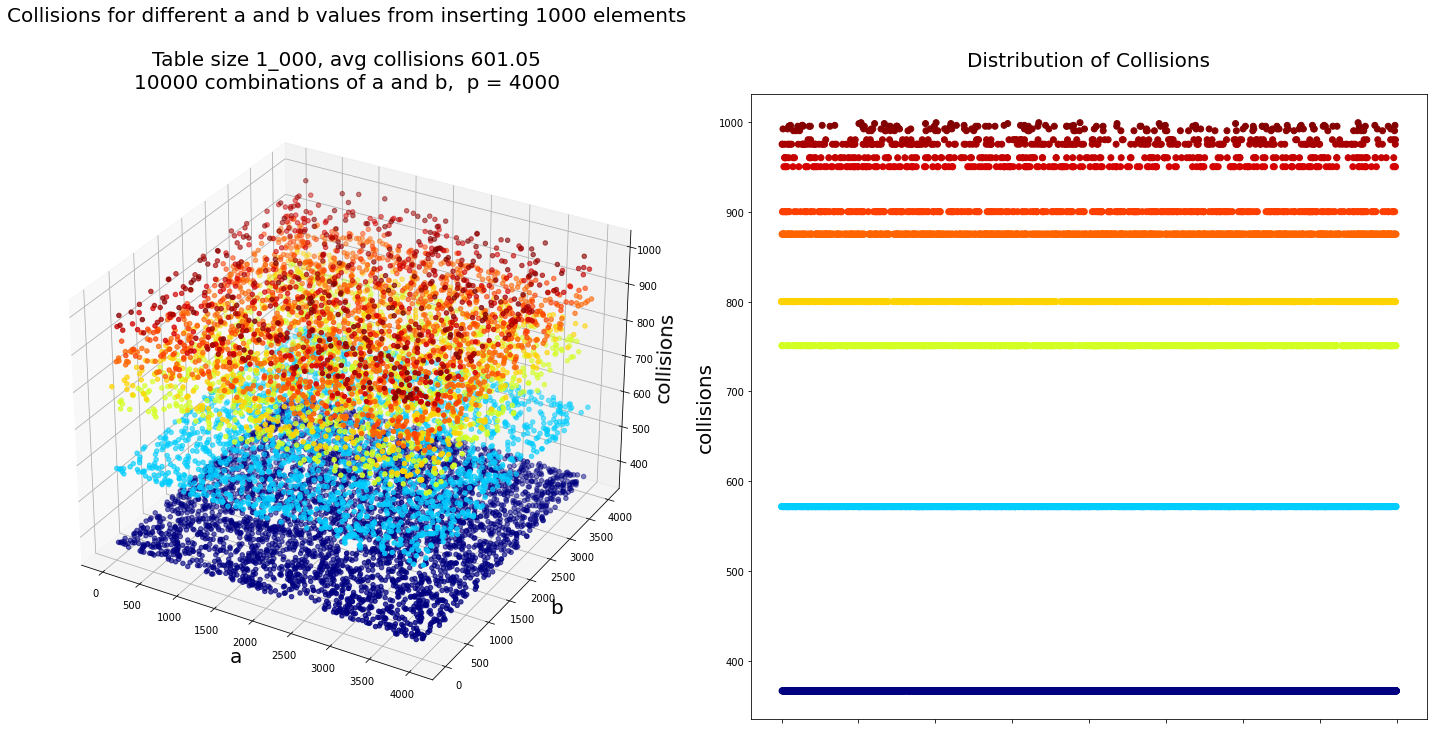

In [15]:
result7 = ex3(p=4000, map_size=1000, iterations=10_000)
visualize(*result7)

# EX3

##### So far we did not ask what to do when the hash table grows full and/or we do not know in advance the final nr. of elements to be hashed. One answer to this is so-called "Extendible hashing" or also "Dynamic hashing". Please study online materials, e.g <a href="https://loonytek.com/2016/05/17/extendible-hashing/">https://loonytek.com/2016/05/17/extendible-hashing/</a> . Summarise the key points of extendible hashing, providing also one illustration (can be from the internet; properly cited of course). Also, report the most useful resource(s).

Extensible hashing uses the least significant bits (LSBs) as the hash and a fixed size for buckets. It stores 2^k, pointers to buckets where k is the number of the LSBs used for the hash. When a bucket overflows and there's more than one pointer to a bucket, the values of the bucket are rehashed and divided between multiple buckets. If there's only one pointer to a bucket then it's necessary to increment the number of bits used for hashing so number of pointers stored is multiplied by 2 and the values of the bucket are rehashed. As a result, the hash table grows dynamically. One of the main drawbacks is that it can unnecessarily waste memory if many values are hashed into the same bucket, as the size doubles with every new increase of number of bits used.

Resources used:

https://loonytek.com/2016/05/17/extendible-hashing/

https://www.geeksforgeeks.org/extendible-hashing-dynamic-approach-to-dbms/

https://en.wikipedia.org/wiki/Extendible_hashing

![Extensible hashing 1](https://i.imgur.com/YCEr5qd.png)
![Extensible hashing 2](https://i.imgur.com/4JO6eOd.png)
![Extensible hashing 3](https://i.imgur.com/IjLX31K.png)

# EX4

##### Hash functions are usually represented as integer -> integer mappings. Yet, keys in dictionaries are usually words, ID-s etc. The purpose of this task is to try to map every English word (e.g. <a href="https://raw.githubusercontent.com/dwyl/english-words/master/words.txt">https://raw.githubusercontent.com/dwyl/english-words/master/words.txt</a>) into an integer (before even applying the hash functions). Since there are many more potential words than integers of length 32 bit or 64 bit, one may ask - how many collisions one would generate simply by conversion of words into integers. Try out some simple ideas - like simply adding all character values ord(c) together and count nr of collisions. Then try to find and implement a better mapping - and report how many collisions there will still be when applied to above very long list of English words. You can measure two things: total nr of colliding integers; and the "most occupied" integer value - for both, the 32 and 64 bit integers.

Simply converting words to integers and adding them is a poor way to hash them, 99.5% of words caused collisions. Multiplying instead of adding numbers is better, only 9.3% words caused collisions. Using Python's builtin hash function managed 0 collisions. I managed to achieve 0 collision as well by converting words to integers then concatenating them as strings and finally converting that string back to an integer. Integers in python are 32bit so results would be the same for 64 bit.

In [16]:
ex4()

Number of words 466_550
Adding character values ord(c) together, collisions: 464_220 , most collisions on a slot: 1122
Multiplying character values ord(c) together, collisions: 43_361, most collisions on a slot: 13
Concatenating ord(c) as string and casting to int, collisions: 0 
Using builtin hash function, collisions: 0 


# EX5

##### Watch this presentation by Titus Brown (2011): <a href="http://pyvideo.org/video/402/pycon-2011--handling-ridiculous-amounts-of-data-w">http://pyvideo.org/video/402/pycon-2011--handling-ridiculous-amounts-of-data-w</a> Explain very briefly the concept of Bloom filters and why Titus and his colleagues use Bloom filters in this case?

Bloom Filters are a probabilistic data structure where a number of different fixed size hash tables are created and every inserted item is hashed into every table individually. Each table uses a different hash function, and it doesn't store the value, instead it simply marks the value as filled (from 0 to 1). Element is present in data if every hash table says it's present.

They use bloom filters as a data reducing prefilter for large biology datasets. It can separate sequences that don't have any overlap or are tightly interconnected, which allows them to analyze separate data on different machines. It helps eliminate small graphs and trim data which DNA assemblers don't use in their calculations, such as repeat rich regions that assemblers are bad at resolving. Their application of bloom filters only works on Bruijn graphs.

# EX6

##### (Bonus 3p) Hidden messages using Bloom Filters. Experiment with the De Bruijn graph approach discussed by Titus Brown in the lecture (see EX3) for "storing text" using Bloom filters... Grab a dictionary like this: <a href="http://www.gutenberg.org/cache/epub/972/pg972.txt">http://www.gutenberg.org/cache/epub/972/pg972.txt</a>  Insert word definitions as individual "messages" -

##### For example for the sentence: EXILE, n. One who serves his country by residing abroad, yet is not an ambassador. Store: "EXILE," , "XILE, " , "ILE, n", "LE, n.", ... (You can use padding in front, e.g. '..........EXILE,' to create keys of length 16 (10+5+1), then '.........EXILE, ' , etc ) ,

##### Hints:

##### create a hash function for text - converting it first into a large integer use one large hash table bitmap (Bloom filter), and apply several different hash functions on the same array To "retrieve", query the Bloom filter with "EXILE," and re-create the entry by trying out all possible characters... (do you improve results by allowing English characters and punctuation only?) Experiment with changing the size of filter and what proportion of bits are set to 1 Experiment with the nr of 3-4-...X different hash functions and different keyword lengths. (you can assume all possible characters from byte code 0 to 255)

##### Measure how many word entries would be retrieved correctly and how many would "get broken" under different parameter settings.

# <font size="20" color="red">TODO</font>

# EX7

##### (Bonus 3p) String A is an anagram of another string B if A is a permutation of the letters in B; for example, (indicatory, dictionary) and (brush, shrub) are pairs of words that are anagrams of each other. In this problem, all strings will be ASCII strings containing only the lowercase English letters a to z.

##### Given two strings A and B, the anagram substring count of B in A is the number of contiguous substrings of A that are anagrams of B. For example, if A = ’esleastealaslatet’ and B = ’tesla’, then, of the 13 contiguous substrings in A of length |B| = 5, exactly 3 of them are anagrams of B, namely (’least’, ’steal’, ’slate’), so the anagram substring count of B in A is 3.

* ##### Given string A and a positive integer k, describe a data structure that can be built in O(|A|) time, which will then support a single operation: given a different string B with |B| = k, return the anagram substring count of B in A in O(k) time.
* ##### Given string T and an array of n length-k strings S = (S0, . . . , Sn-1) satisfying 0 < k < |T|, describe an O(|T| + nk)-time algorithm to return an array A = (a0, . . . , an-1) for which ai is the anagram substring count of Si in T for all i ∈ {0, . . . , n − 1}.

I create an array of length 26 (length of the alphabet). For substring of A of length $|B|$ I store the count of its letters an array. And I treat every new substring similarly to a fixed size queue - I decrement index of the letter not in the substring any more and increment index of the new letter. Array that stores count of every alphabet letter in the substring is stored as the key, and its value is the number of times such an array was added. If the count of every letter in two words is the same they are anagrams of each other.

For loop in hash_code_structure(A, k) performs the same set of actions for every character in $A$, therefore it's complexity is $O(|A|)$. Similarly, getting a substring count from the created data structure takes $O(|B|)$ time. When I have an array with n elements which contains only k length words I only need to create the map once and reuse it for every new word, that takes $O(|T| + nk)$ time - creating the map + finding count of $k$ length anagrams $n$ times.

In [3]:
alphabet = "abcdefghijklmnopqrstuvwxyz"

def hash_code_structure(A : str, k : int): # len(A) > len(B)
    vectors = defaultdict(lambda : 0)
    vector = [0] * len(alphabet)

    for i in range(len(A)): #O(|B|)
        vector[ord(A[i]) - 97] += 1 # decrement by 97 because a = 97 in ASCII
        if i >= k-1:
            vectors[tuple(vector)] += 1 # substring of length k
            vector[ord(A[i-(k-1)]) - 97] -= 1
    return vectors

def hash_code(B : str): # O(k)
    result = [0] * len(alphabet)
    for char in B:
        result[ord(char) - 97] += 1
    return tuple(result)

def contiguous_substring_count(A : str, B : str):
    structure = hash_code_structure(A, len(B))
    return structure[hash_code(B)]

def contiguous_substring_count_arr(A : str, B_list : list):
    structure = hash_code_structure(A, len(B_list[0]))
    return [structure[hash_code(B)] for B in B_list]

print(f"Anagram substring count of 'tesla' in 'esleastealaslatet' is",
      contiguous_substring_count('esleastealaslatet', 'tesla'))

print(f"Anagram substring count of ['tesla', 'tease'] in 'esleastealaslatet' is",
      contiguous_substring_count_arr('esleastealaslatet', ['tesla', 'tease']))

Anagram substring count of 'tesla' in 'esleastealaslatet' is 3
Anagram substring count of ['tesla', 'tease'] in 'esleastealaslatet' is [3, 1]
